In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
#Load the data from the csv files
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
# Display the shape of each dataset
print("Customers shape:", customers.shape)
print("Products shape:", products.shape)
print("Transactions shape:", transactions.shape)

Customers shape: (200, 4)
Products shape: (100, 4)
Transactions shape: (1000, 7)


In [9]:
# Check for missing values
print(customers.isnull().sum())
print()
print(products.isnull().sum())
print()
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


- The datasets has no missing values.

In [10]:
# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


- The datasets has no duplicate rows.

In [11]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [12]:
# Count of unique regions in Customers
region_counts = customers['Region'].value_counts()
print(region_counts)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [13]:
# Count of products by category
category_counts = products['Category'].value_counts()
print(category_counts)

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [14]:
# Descriptive statistics for Transactions
print(transactions.describe())

                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


### Analysis of Transaction Data

Here are the key observations:

- **Quantity:**
  - Customers prefer small, frequent purchases.
  - Potential for upselling (e.g., "Buy 3, get 1 free").

- **Total Value:**
  - A small subset of large transactions drives most revenue.
  - Focus on retaining high-value customers (e.g., loyalty programs).

- **Price:**
  - Mixed customer segments: Some buy budget items ($147.95 median), others buy premium ($404.40).
  - Potential for tiered pricing (e.g., basic vs. premium bundles).

# Data Visualizations

In [15]:
sns.set(style="whitegrid")

Bin
(0, 250]        202
(250, 500]      275
(500, 750]      124
(750, 1000]     142
(1000, 1250]     84
(1250, 1500]     92
(1500, 1750]     55
(1750, 2000]     26
Name: count, dtype: int64


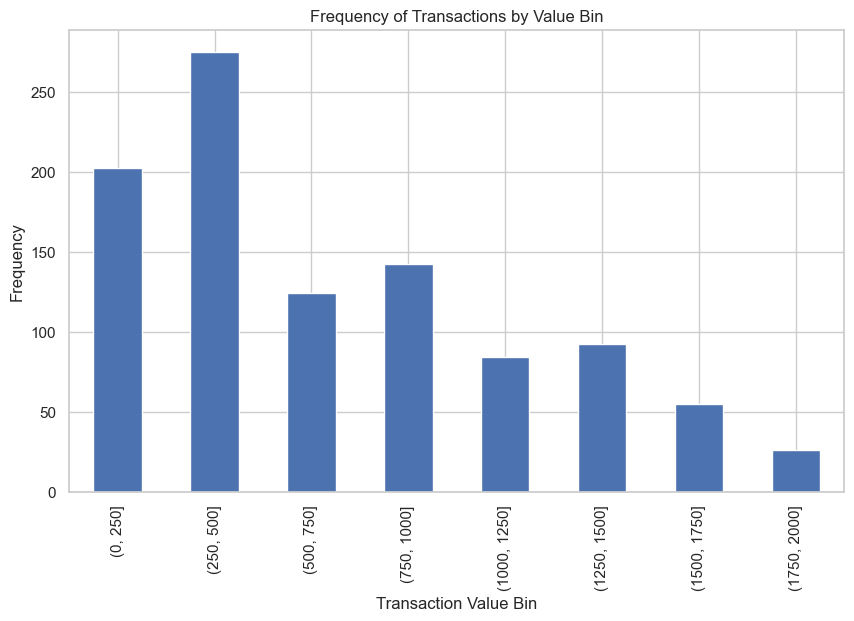

In [16]:
# Define bins
bin_edges = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]

# Categorize transactions into bins
transactions['Bin'] = pd.cut(transactions['TotalValue'], bins=bin_edges)

# Calculate frequency counts
frequency_counts = transactions['Bin'].value_counts().sort_index()
print(frequency_counts)

# Visualize the results
frequency_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Transactions by Value Bin')
plt.xlabel('Transaction Value Bin')
plt.ylabel('Frequency')
plt.show()

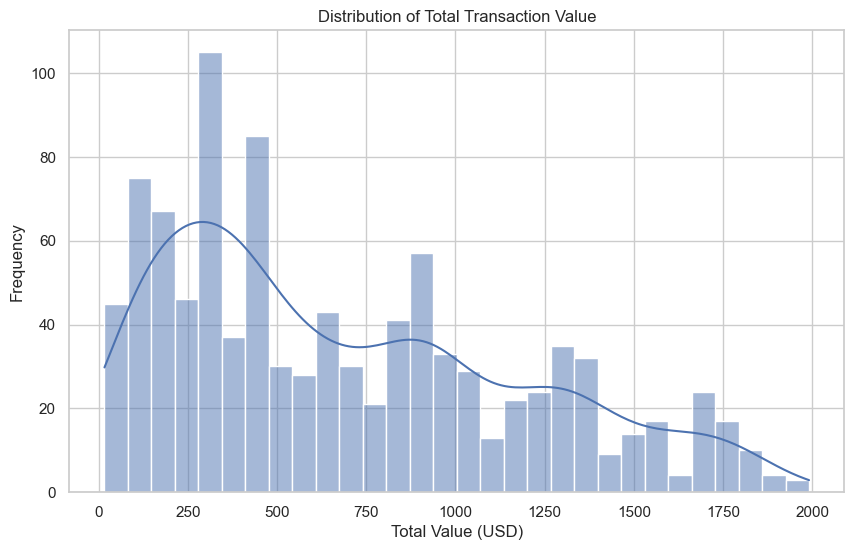

In [17]:
# 1. Histogram of TotalValue
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')
plt.show()

- The majority of transactions (47.7%) are small (≤$500). (Revenue Dependent on small transactions)
- Mid-range transactions (500–1000) account for 26.6% of transactions. (Moderate Transactions Represent Growth Opportunity)
- Only 25.7% of transactions are above $1000, with very few (26 transactions) in the highest bin (1750–2000). ( High-Value Transactions Are Rare but Critical)

- The customer base is attracted to affordable products more.

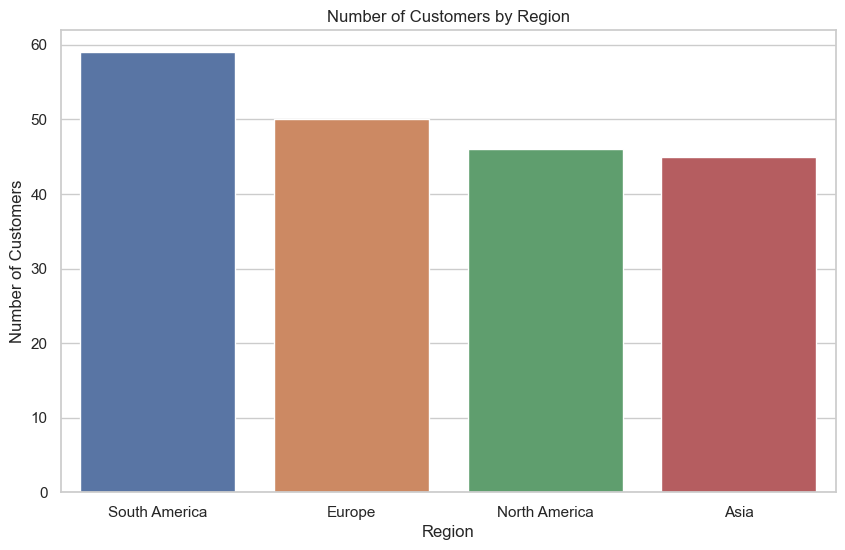

In [18]:
# 2. Bar chart for transactions by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', order=region_counts.index)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

- Customers are almost evenly distributed across all regions.
- No single region dominates, indicating opportunities for growth everywhere.

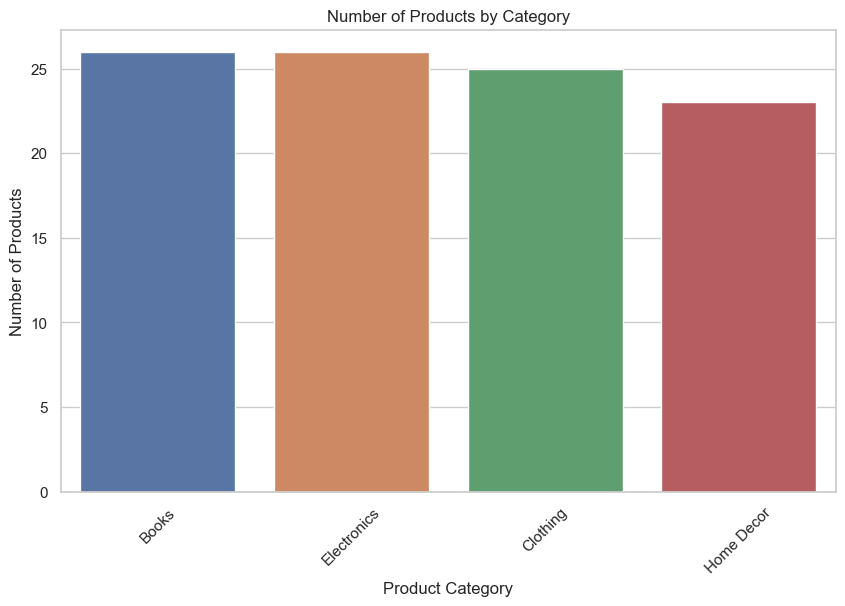

In [19]:
# 3. Bar chart for product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category', order=category_counts.index)
plt.title('Number of Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

- Your product portfolio is diverse and well-rounded.
- No single category dominates, indicating opportunities for growth in all areas.

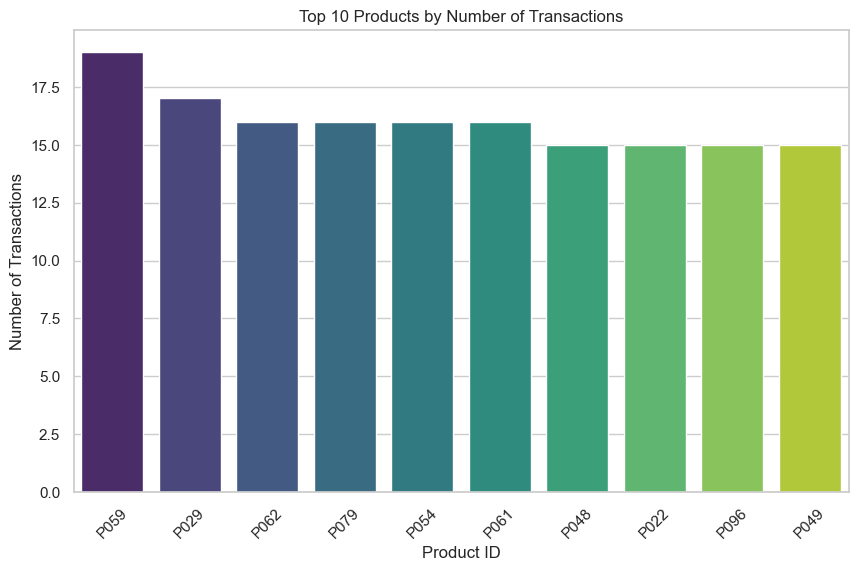

In [20]:
# Top N products to display
top_n = 10

# Filter the top N products
top_products = transactions['ProductID'].value_counts().nlargest(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title(f'Top {top_n} Products by Number of Transactions')
plt.xlabel('Product ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


In [25]:
# Merge transactions with products based on ProductID
merged_data = transactions.merge(products, on='ProductID', how='inner')

# Aggregate data to count transactions by Category
category_transactions = merged_data['Category'].value_counts().nlargest(10)

# Print the top product categories by number of transactions
print("Top Product Categories by Number of Transactions:")
print(category_transactions)

Top Product Categories by Number of Transactions:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


In [26]:
# Aggregate data to count transactions by ProductName
product_sales = merged_data['ProductName'].value_counts().nlargest(10)

# Print the top 10 best-selling products
print("Top 10 Best-Selling Products by Number of Transactions:")
print(product_sales)

Top 10 Best-Selling Products by Number of Transactions:
ProductName
ActiveWear Smartwatch    40
SoundWave Headphones     38
BookWorld Biography      30
ActiveWear Rug           29
SoundWave Cookbook       29
HomeSense Desk Lamp      28
ActiveWear Jacket        26
TechPro Textbook         25
TechPro T-Shirt          24
ActiveWear Textbook      23
Name: count, dtype: int64


In [32]:
# Add a revenue column (Revenue = Quantity × Price)
merged_data['Revenue'] = merged_data['Quantity'] * merged_data['Price_x']

# Calculate total revenue by category
category_revenue = merged_data.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

# Print the categories by revenue
print("Categories by Revenue (Descending):")
print(category_revenue)

Categories by Revenue (Descending):
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: Revenue, dtype: float64


- Books Drive Both Transactions and Revenue
- Electronics Generate High Revenue Per Transaction
- Scope of improvement for Clothing and Home Decor (Need more marketing support or discount offers)

In [63]:
# Reset the index of the transactions DataFrame
transactions.reset_index(inplace=True)

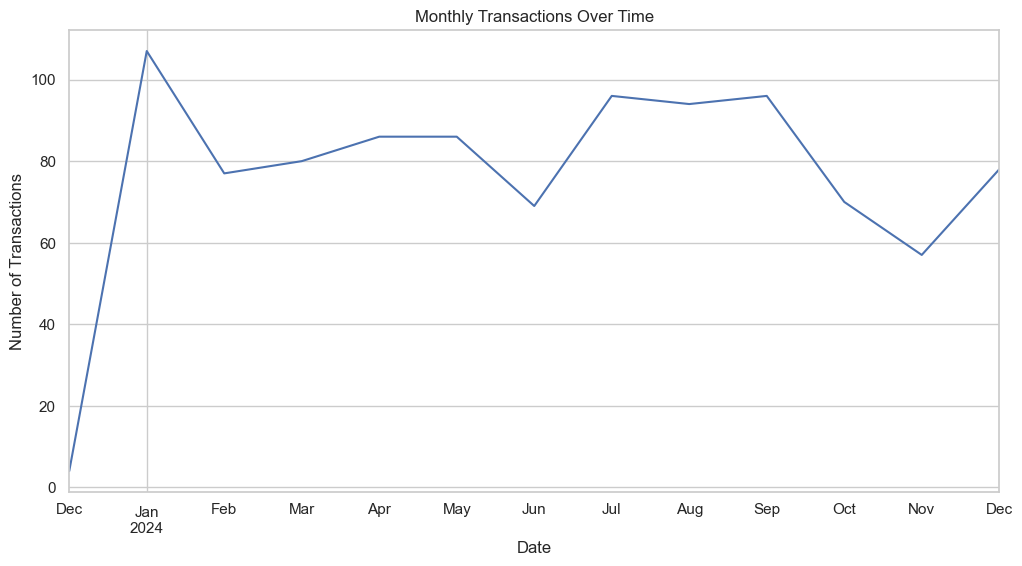

In [49]:
# 5. Time series plot of transactions over time
transactions.set_index('TransactionDate', inplace=True)
transactions.resample('M').size().plot(figsize=(12, 6))
plt.title('Monthly Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

- Strong Start in January. This could be due to New Year promotions, holiday shopping spillover, or seasonal demand.
- Stable Mid-Year Performance. 
- Decline in October & November.
- Recovery in December.

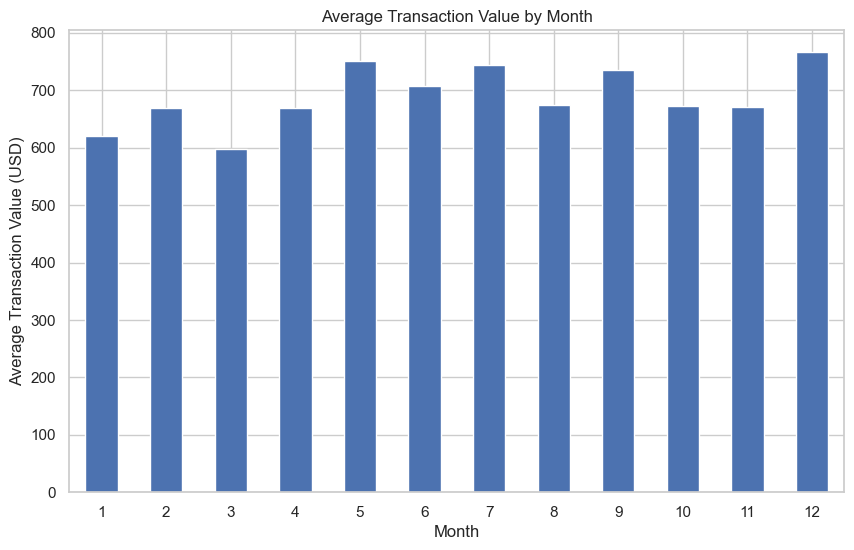

In [50]:
# 6. Average Transaction Value by Month
avg_transaction_value = transactions.groupby(transactions.index.month)['TotalValue'].mean()
plt.figure(figsize=(10, 6))
avg_transaction_value.plot(kind='bar')
plt.title('Average Transaction Value by Month')
plt.xlabel('Month')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=0)
plt.show()

- Highest Spending Months: May, July, September and December
- Lowest Spending Month: March

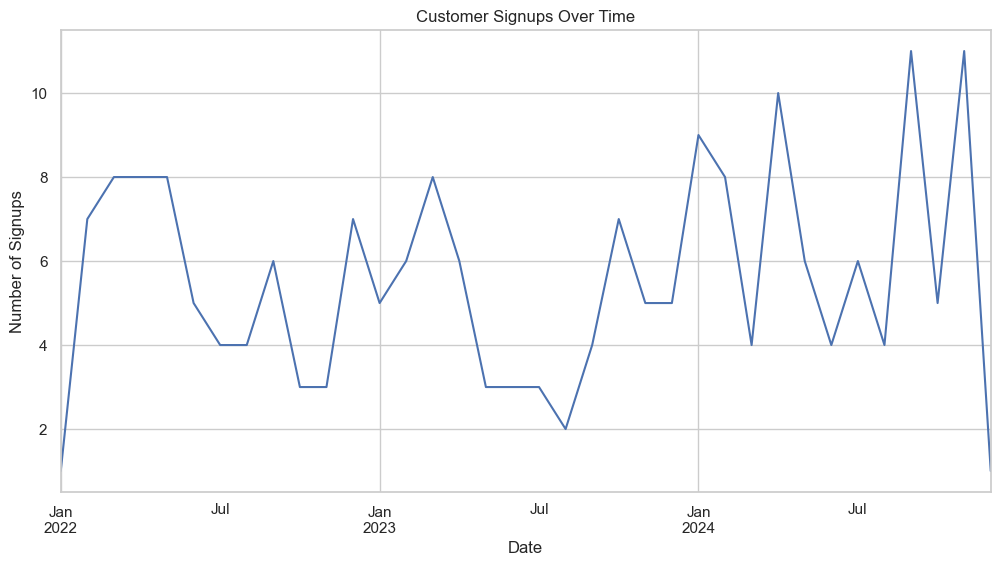

In [52]:
# 8. Customer Signup Trends Over Time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers.set_index('SignupDate', inplace=True)
customers.resample('M').size().plot(figsize=(12, 6))
plt.title('Customer Signups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.show()

In [34]:
# Ensure the 'SignupDate' is in datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Group by year, then count signups
customers['Year'] = customers['SignupDate'].dt.to_period('Y')  # 'Y' is for yearly grouping
signup_counts = customers.groupby('Year').CustomerID.count()

# Print the results
print(signup_counts)

Year
2022    64
2023    57
2024    79
Freq: A-DEC, Name: CustomerID, dtype: int64


- Significant Recovery in 2024.
- Investigate 2023 Decline.